# Example

In [1]:
# import libraries
import gym
import gym_trading
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [2]:
# creating environment
env = gym.make('trading-v0', n_samples=10000, sampling_every=10, stack_size=5, fee=0.25)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [3]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')

Observation: [9149.4 9195.  9205.2 9205.5 9209.9] (type: <class 'numpy.ndarray'>)


In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
while not done:

    # random action [BUY, SELL]
    action = np.random.randint(500)  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} -'
              f'Reward (AAV): {reward} -'
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 -Reward (AAV): 0 -Done: False - Price: [9195.   9205.2  9205.5  9209.9  9284.15] (type: <class 'numpy.ndarray'>)
Iteration: 1000 -Reward (AAV): 0 -Done: False - Price: [6359.85 6388.85 6380.6  6370.2  6578.4 ] (type: <class 'numpy.ndarray'>)
Iteration: 2000 -Reward (AAV): -1922.225483398438 -Done: False - Price: [3742.4  3791.2  3789.9  3805.85 3842.6 ] (type: <class 'numpy.ndarray'>)
Iteration: 3000 -Reward (AAV): -738.7534643554689 -Done: False - Price: [3900.4  3911.85 3917.   3926.8  3890.5 ] (type: <class 'numpy.ndarray'>)
Iteration: 4000 -Reward (AAV): -100.96005940755197 -Done: False - Price: [10898.9 11214.2 10800.1 10653.3 10804.1] (type: <class 'numpy.ndarray'>)
Iteration: 5000 -Reward (AAV): 885.1995489501957 -Done: False - Price: [8154.9  8140.35 8097.2  8099.   7957.95] (type: <class 'numpy.ndarray'>)
Iteration: 6000 -Reward (AAV): 475.0464218750004 -Done: False - Price: [8910.3  8877.4  8871.95 8878.85 8925.05] (type: <class 'numpy.ndarray'>)
Iteration: 7000 

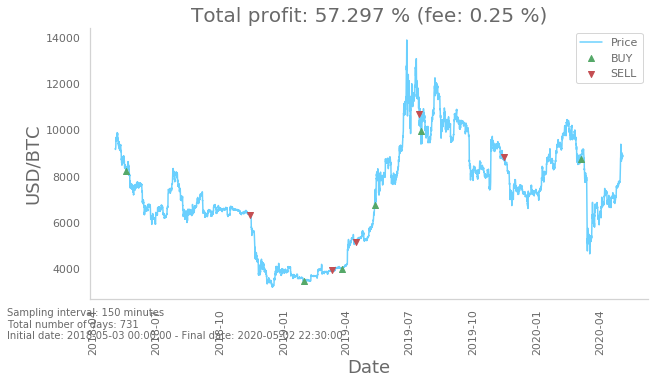

In [5]:
env.render()

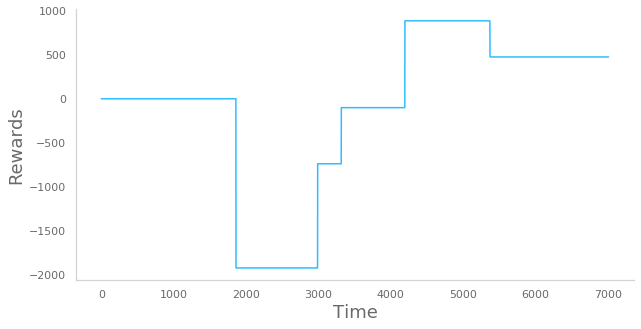

In [6]:
plt.plot(rewards)
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.show()